In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import minimize_scalar
from scipy.special import j1
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk', font_scale=2)

     fun: -0.23330441717143405
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 11.706004881285123


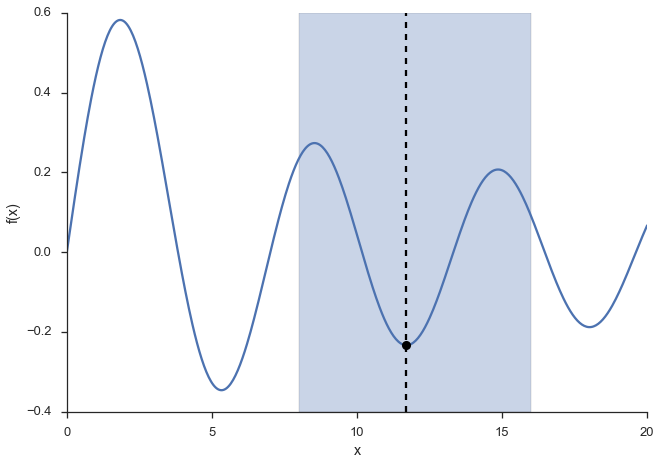

In [5]:
result = minimize_scalar(j1, method="bounded", bounds=[8, 16])
print(result)
xmin = result.x
x = np.linspace(0, 20, 500)
plt.plot(x, j1(x))
plt.plot(xmin, j1(xmin), 'ok')
plt.axvline(xmin, color='k', ls='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axvspan(8, 16, alpha=0.3)
sns.despine()

Shape (303, 384)


([], <a list of 0 Text yticklabel objects>)

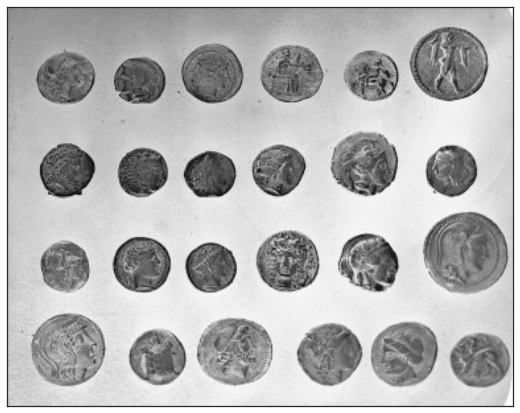

In [7]:
from scipy import ndimage
import skimage.measure
import skimage.data

img = skimage.data.coins()
print("Shape", img.shape)
plt.imshow(img); plt.xticks([]); plt.yticks([])

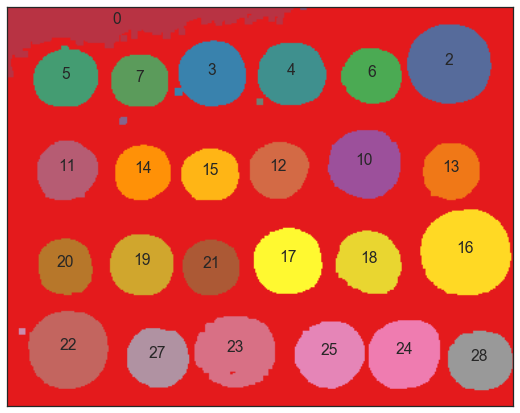

In [9]:
th = 120
bw = (img > th)
dilated = ndimage.generic_filter(bw, max, size=(5, 5))
labels = skimage.measure.label(dilated)
label_props = skimage.measure.regionprops(labels)
plt.imshow(labels, cmap=plt.cm.Set1)
plt.xticks([]); plt.yticks([])
for i, props in enumerate(label_props):
    if props.area < 500: continue
    y, x = props.centroid
    plt.text(x, y, i, fontdict={'horizontalalignment':'center'})

In [12]:
import sklearn.datasets
import sklearn.neighbors as nb
import sklearn.cross_validation as cv

In [19]:
iris = sklearn.datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=20, random_state=11)
X_train = X_train[:,2:]
X_test = X_test[:,2:]

In [20]:
knn = nb.KNeighborsClassifier()
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
print(y_hat)
print(y_test)
print('Accuracy:', (y_hat == y_test).mean())

[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2]
[2 2 2 1 2 0 1 0 0 1 2 1 1 2 2 0 2 1 2 2]
Accuracy: 0.9


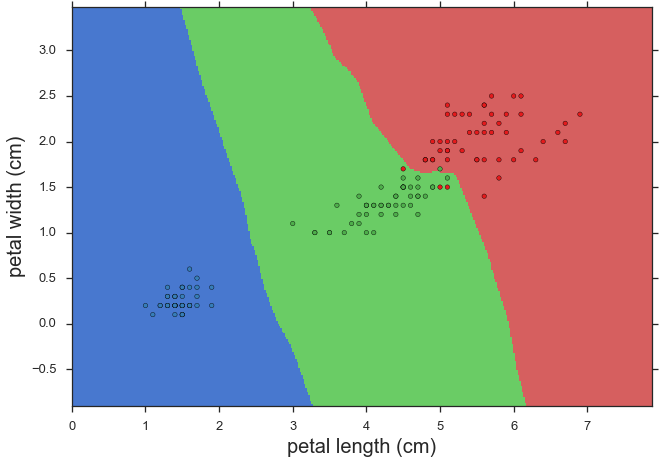

In [22]:
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh
X = iris.data[:,2:]
y = iris.target

# Create color maps
cmap_light = ListedColormap(sorted(sns.color_palette('muted', 3)))
cmap_bold = ListedColormap(sorted(sns.color_palette('Set1', 3)))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
ax.set(
    xlim=(xx.min(), xx.max()),
    ylim=(yy.min(), yy.max())
)
ax.set_xlabel(iris.feature_names[2], fontsize=20)
ax.set_ylabel(iris.feature_names[3], fontsize=20);

In [23]:
from scipy.integrate import odeint

In [24]:
def vectorfield(w, t, *p):
    """Defines the differential equations for the coupled spring-mass system.

    Arguments
    ---------
     w :  np.ndarray
         vector of the state variables: w = [x1, y1, x2, y2]
     t :  float
         time
     p :  tuple 
         problem parameters: p = (m1, m2, k1, k2, L1, L2, b1, b2) 
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    # return x1', y1', x2', y2'
    return (
        y1,
        (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1,
        y2,
        (-b2 * y2 - k2 * (x2 - x1 - L2)) / m2
    )    

In [25]:
# Parameter values
# Masses:
m1 = 1.0
m2 = 1.5
# Spring constants
k1 = 8.0
k2 = 40.0
# Natural lengths
L1 = 0.5
L2 = 1.0
# Friction coefficients
b1 = 0.8
b2 = 0.5

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.5
y1 = 0.0
x2 = 2.25
y2 = 0.0
w0 = x1, y1, x2, y2

# Create the time samples for the output of the ODE solver
t = np.linspace(0, 10, 250)

# Solve
solution = odeint(vectorfield, w0, t, args=(m1, m2, k1, k2, L1, L2, b1, b2))
x1, y1, x2, y2 = solution[:,0], solution[:,1], solution[:,2], solution[:,3]

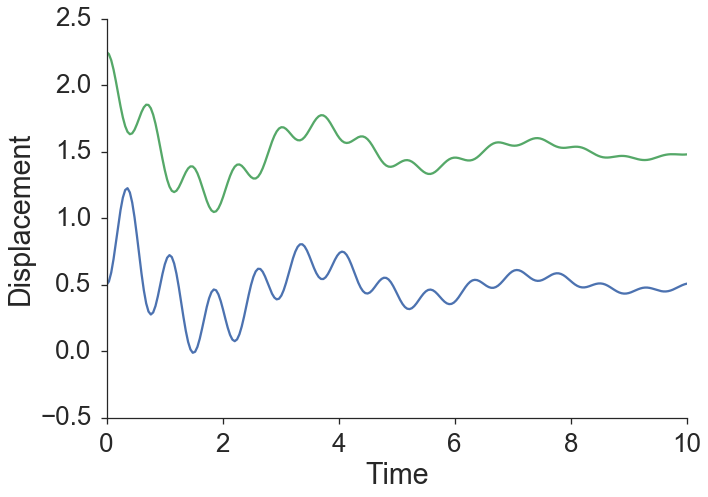

In [32]:
plt.plot(t, x1, label=r'$x_1$')
plt.plot(t, x2, label=r'$x_2$')
plt.xlabel('Time')
plt.ylabel('Displacement')
sns.despine()

In [35]:
import scipy.optimize

N0=1.550, K=8.380, r=0.718


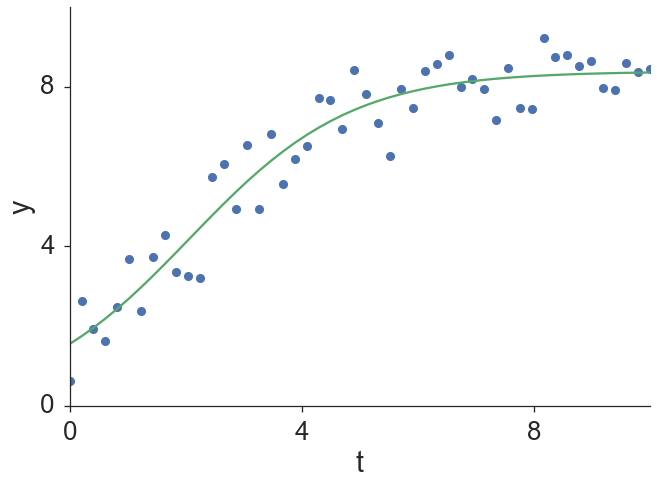

In [43]:
def logistic(t, N0, K, r):
    return K / (1 - (1 - K/N0) * np.exp(-r * t))

t = np.linspace(0,10)
y = logistic(t, N0=1.5, K=8.5, r=0.75) +  np.random.normal(loc=0, scale=0.7, size=t.shape)
params, cov = scipy.optimize.curve_fit(f=logistic, xdata=t, ydata=y, p0=(1, 10, 1))
N0, K, r = params

plt.plot(t, y, 'o')
plt.plot(t, logistic(t, N0, K, r), '-')
plt.xlabel('t')
plt.ylabel('y')
plt.xticks([0, 4, 8])
plt.yticks([0 ,4, 8])
sns.despine()
print('N0={0:.3f}, K={1:.3f}, r={2:.3f}'.format(N0, K, r))